### 1. importing the libraries for data cleaning , preprocessing, feature engineering

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
%matplotlib inline

### 2.importing the dataset

In [8]:

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.shape #this dataset has 303 rows and 14 columns

(303, 14)

In [10]:
df.columns # shows names of columns present in dataset

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Attribute information:

In [13]:
#analysing target variable

In [14]:
df['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [15]:
df['target'].unique()

array([1, 0], dtype=int64)

In [16]:
#there are two categories (1,0) in target variable,so this is clearly a classification problem

 #### Checking correlation between columns 

In [17]:
print(df.corr()["target"].abs().sort_values(ascending=False)) 

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## 3. Exploratory Data Analysis (EDA)

### First, analysing the target variable:


<AxesSubplot:xlabel='target', ylabel='count'>

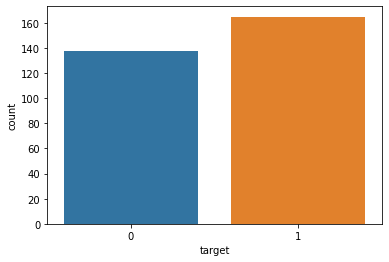

In [18]:
y= df['target']
sns.countplot(y)

In [19]:

target_values = df.target.value_counts()

print(target_values)

1    165
0    138
Name: target, dtype: int64


In [20]:
print("Percentage of patients without heart problems: "+str(round(target_values[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_values[1]*100/303,2)))


Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


###  analyse independent features: 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' 

#### Analysing the 'Sex' feature

In [21]:
df['sex'].unique() 

array([1, 0], dtype=int64)

In [22]:
df.sex.unique()

array([1, 0], dtype=int64)

In [23]:
# sex feature has two categories: 1 [male],0 [female] 

<AxesSubplot:xlabel='sex', ylabel='target'>

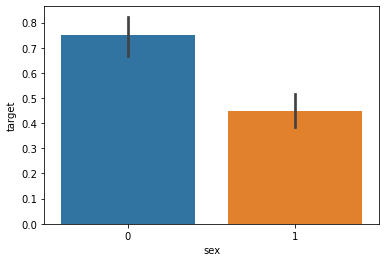

In [24]:
sns.barplot(df['sex'],y) #sns.barplot(col_x,col_y)

In [25]:
# as per the barplot, females are more likely to have heart problems than males

#### Analysing the 'Chest Pain Type' feature

In [26]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

<AxesSubplot:xlabel='cp', ylabel='target'>

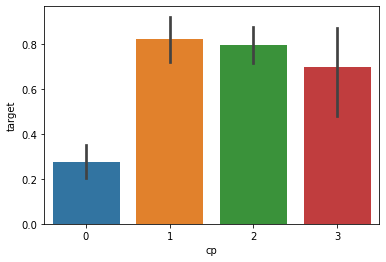

In [27]:
sns.barplot(df['cp'],y)

#### Analysing the FBS feature

In [28]:
df['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [29]:
df['fbs'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='fbs', ylabel='target'>

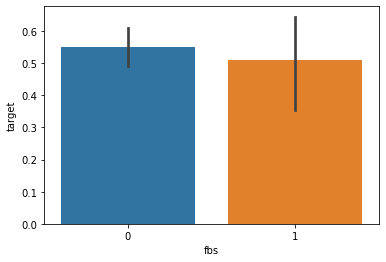

In [30]:
sns.barplot(df['fbs'],y)

In [31]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

#### Analysing the restecg feature

In [32]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot:xlabel='restecg', ylabel='target'>

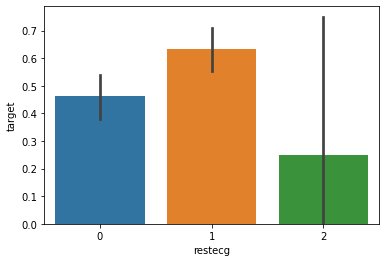

In [33]:
sns.barplot(df['restecg'],y)

#### Analysing the 'exang' feature

In [34]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [35]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='target'>

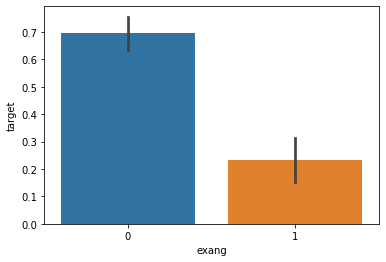

In [36]:
sns.barplot(df['exang'],y)

#### Analysing the Slope feature

In [37]:
df['slope'].unique()

array([0, 2, 1], dtype=int64)

In [38]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='target'>

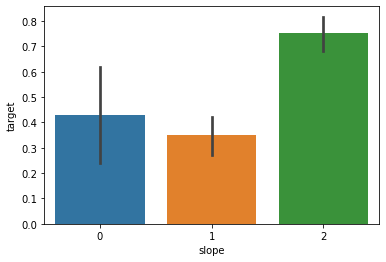

In [39]:
sns.barplot(df['slope'],y)

#### Analysing the 'ca' feature

In [40]:
#number of major vessels (0-3) colored by flourosopy

In [41]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [42]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='target'>

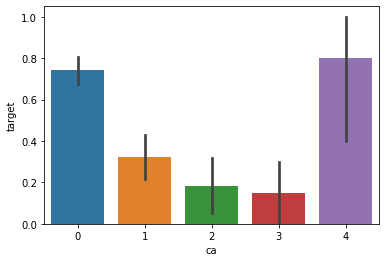

In [43]:
sns.barplot(df['ca'],y)

####  Analysing the 'thal' feature

In [44]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [45]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='target'>

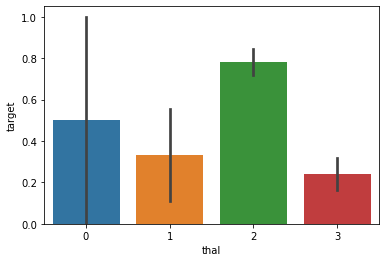

In [46]:
sns.barplot(df['thal'],y)

<AxesSubplot:xlabel='thal', ylabel='target'>

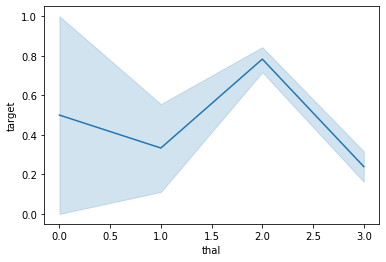

In [47]:
sns.lineplot(df['thal'],y)

<AxesSubplot:xlabel='thal', ylabel='count'>

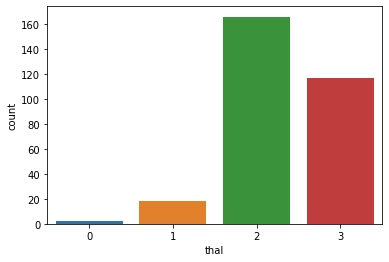

In [48]:
sns.countplot(df['thal'])

<AxesSubplot:xlabel='thal', ylabel='Density'>

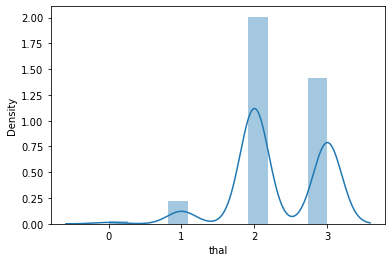

In [49]:
sns.distplot(df['thal'])

#### function to detect outliers

In [50]:
def outlier_thresholds(dataframe,variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [51]:
for i in df.columns:
    print(f'lower limit and upper limit of {i} is {outlier_thresholds(df,i)}')

lower limit and upper limit of age is (6.0, 102.0)
lower limit and upper limit of sex is (-1.5, 2.5)
lower limit and upper limit of cp is (-3.0, 5.0)
lower limit and upper limit of trestbps is (47.0, 215.0)
lower limit and upper limit of chol is (6.799999999999983, 490.0)
lower limit and upper limit of fbs is (-1.5, 2.5)
lower limit and upper limit of restecg is (-1.5, 2.5)
lower limit and upper limit of thalach is (25.099999999999966, 267.50000000000006)
lower limit and upper limit of exang is (-1.5, 2.5)
lower limit and upper limit of oldpeak is (-4.199999999999999, 6.999999999999999)
lower limit and upper limit of slope is (-0.5, 3.5)
lower limit and upper limit of ca is (-3.0, 5.0)
lower limit and upper limit of thal is (0.5, 4.5)
lower limit and upper limit of target is (-1.5, 2.5)


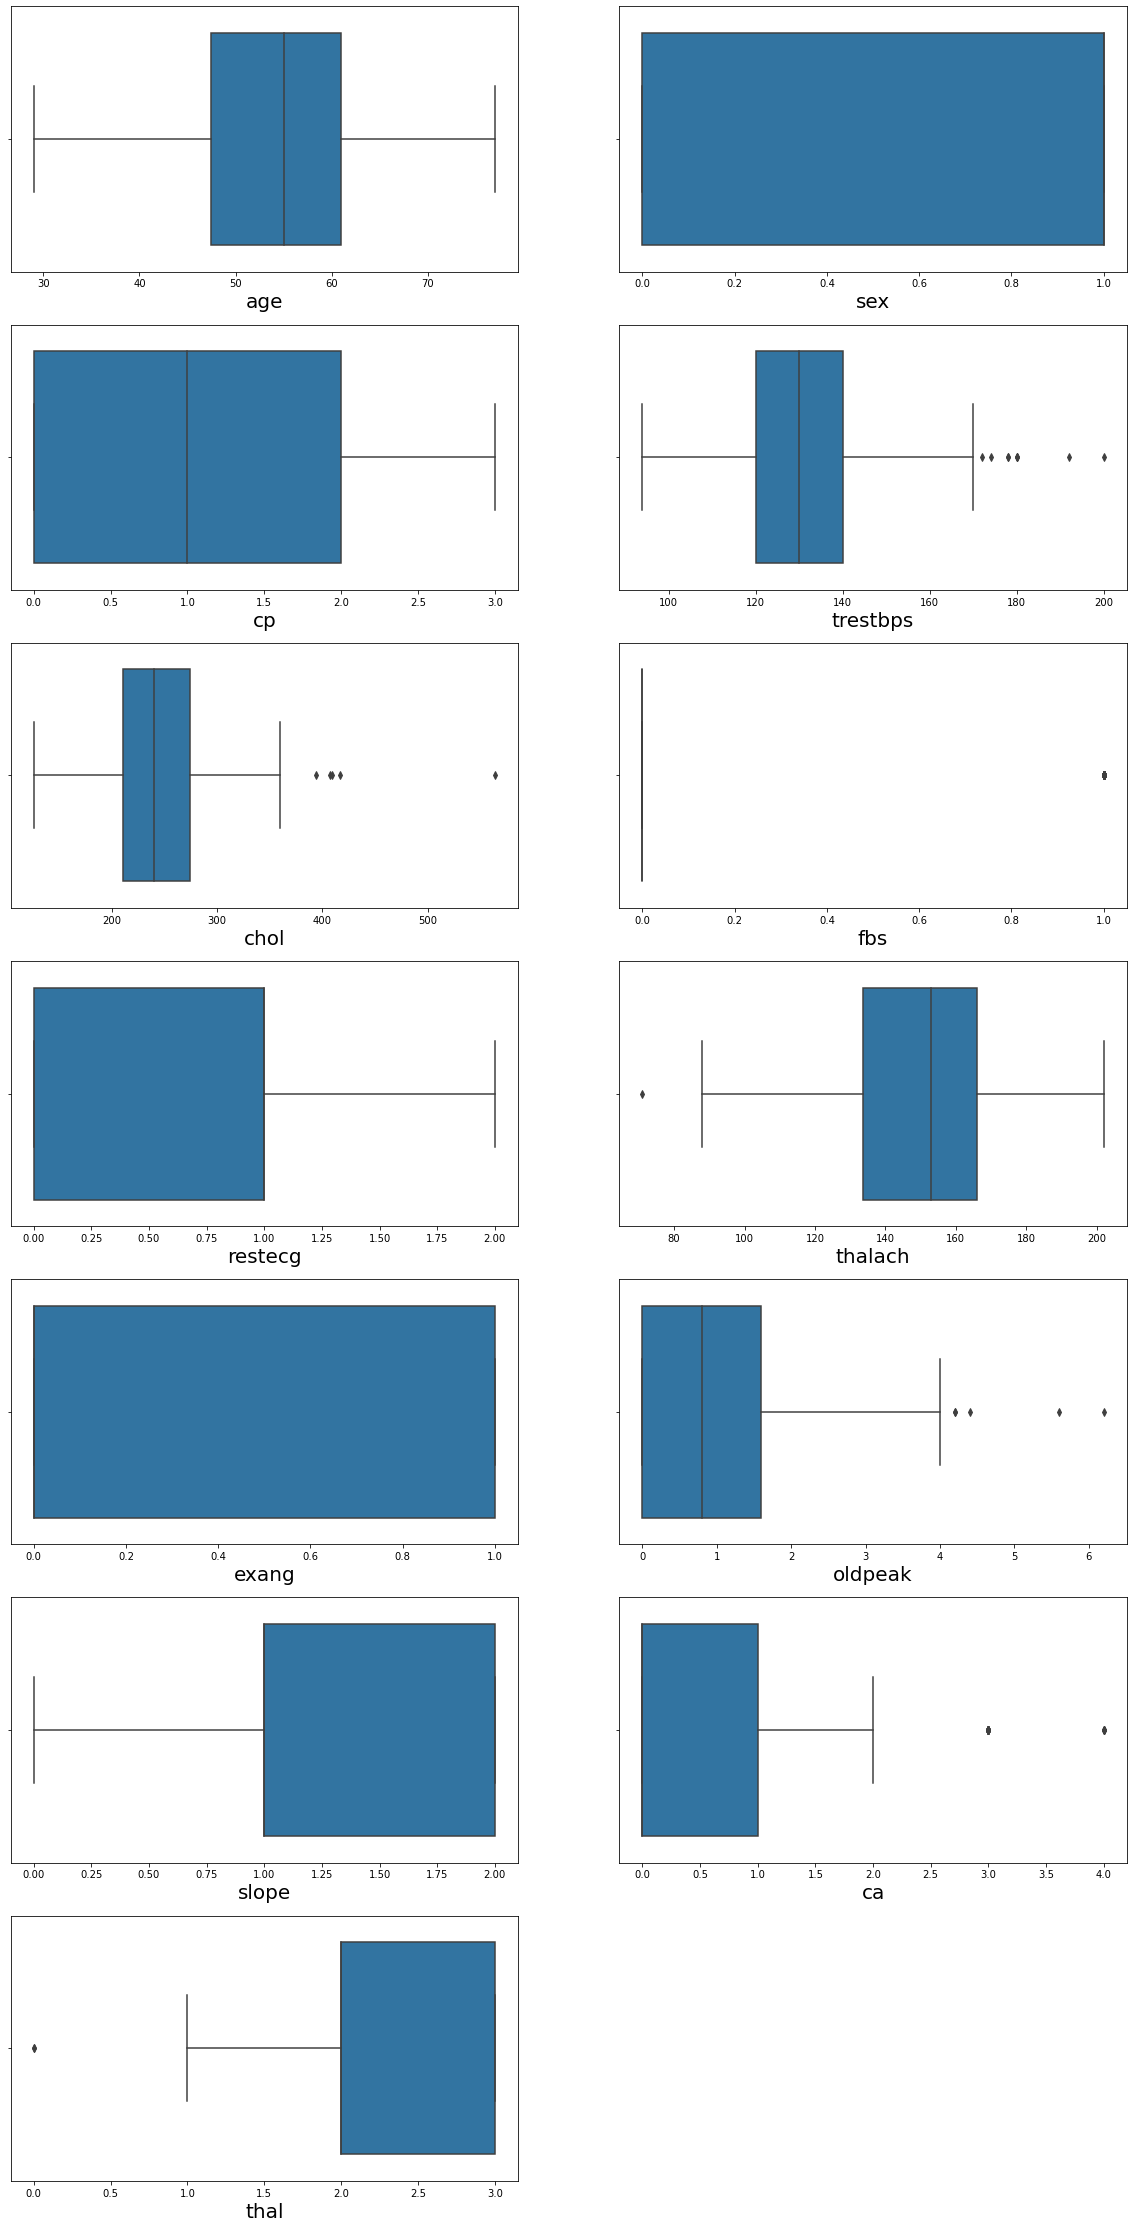

In [52]:
plt.figure(figsize=(20,40))
pltnumber = 1

for column in df:
    if pltnumber<14: ##no of columns =14
        ax=plt.subplot(7,2,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()

#### function to remove outliers

In [53]:
def replace_with_thresholds(dataframe,columns):
    for variable in columns:
        low_limit,up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable]< low_limit),variable] = low_limit
        dataframe.loc[(dataframe[variable]> up_limit),variable] = up_limit
        
        
replace_with_thresholds(df , df.columns)

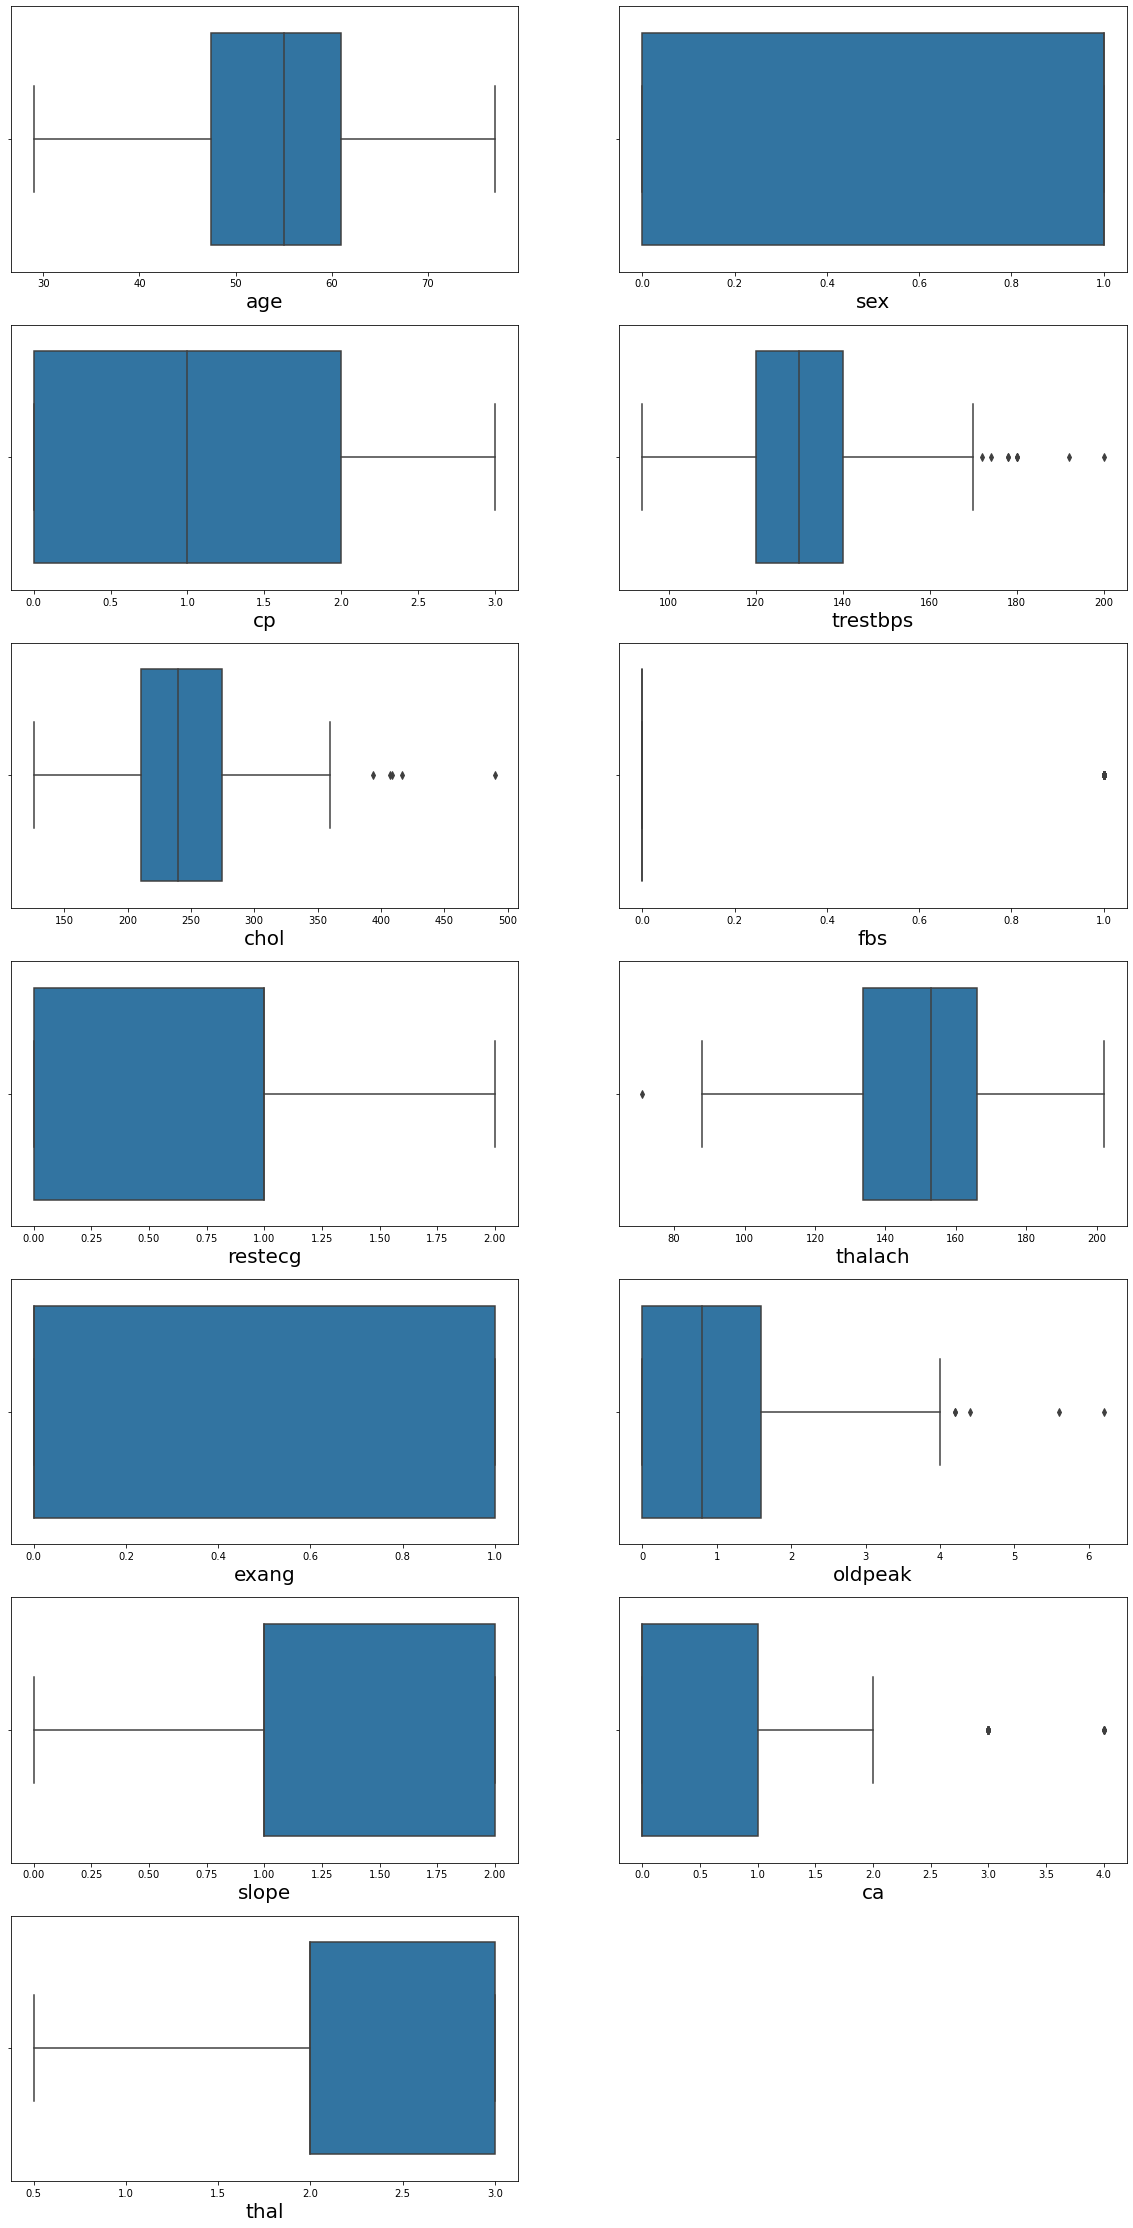

In [54]:
plt.figure(figsize=(20,40))
pltnumber = 1

for column in df:
    if pltnumber<14: ##no of columns =14
        ax=plt.subplot(7,2,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    pltnumber+=1
plt.show()

In [55]:
df1 = df.copy()

In [56]:
def remove_outliers_IQR(col):
    #finding thr IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print('percentile25 : ',percentile25)
    print('percentile75 : ',percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    print('upper_limit : ',upper_limit)
    print('lower_limit : ',lower_limit)
    df1[col] = np.where(df1[col]>upper_limit , upper_limit, np.where(df1[col]<lower_limit, lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [57]:
remove_outliers_IQR('trestbps')

percentile25 :  120.0
percentile75 :  140.0
upper_limit :  170.0
lower_limit :  90.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [58]:
remove_outliers_IQR('chol')

percentile25 :  211.0
percentile75 :  274.5
upper_limit :  369.75
lower_limit :  115.75


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [59]:
remove_outliers_IQR('fbs')

percentile25 :  0.0
percentile75 :  0.0
upper_limit :  0.0
lower_limit :  0.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [60]:
remove_outliers_IQR('thalach')

percentile25 :  133.5
percentile75 :  166.0
upper_limit :  214.75
lower_limit :  84.75


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [61]:
remove_outliers_IQR('oldpeak')

percentile25 :  0.0
percentile75 :  1.6
upper_limit :  4.0
lower_limit :  -2.4000000000000004


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [62]:
remove_outliers_IQR('ca')

percentile25 :  0.0
percentile75 :  1.0
upper_limit :  2.5
lower_limit :  -1.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [63]:
remove_outliers_IQR('thal')

percentile25 :  2.0
percentile75 :  3.0
upper_limit :  4.5
lower_limit :  0.5


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [64]:
# now we are comparing dataframes before (df) and after(df1) removing outliers.

In [65]:
def create_comparison_plot(df,df1,column):
    #comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])
    
    plt.subplot(2,2,4)
    sns.boxplot(df1[column])
    
    plt.show()

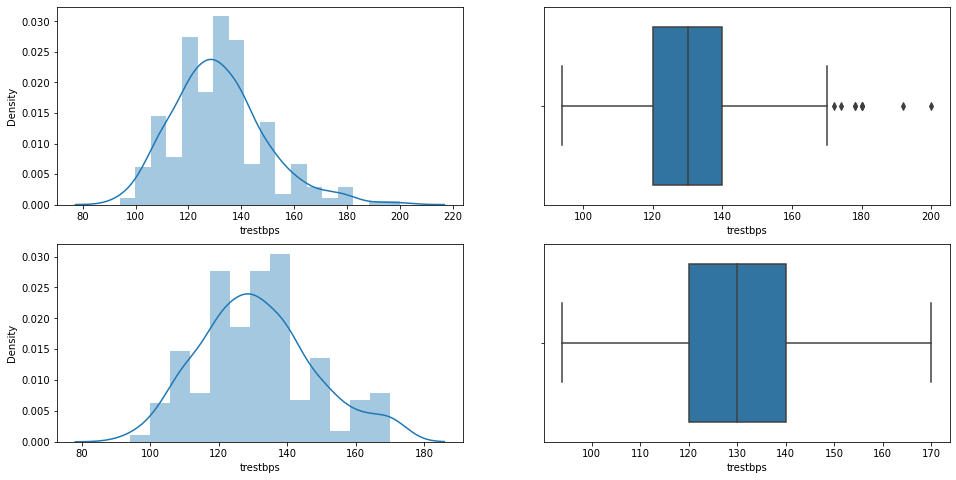

In [66]:
create_comparison_plot(df,df1,'trestbps')

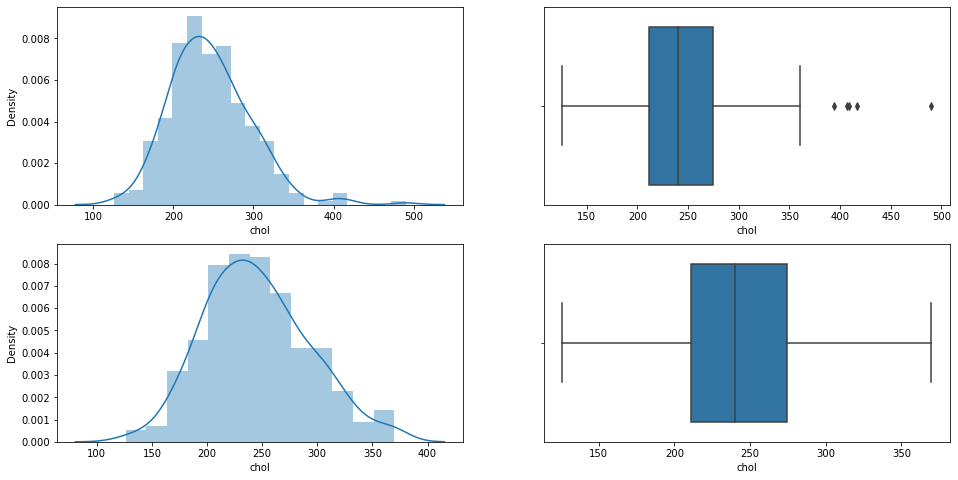

In [67]:
create_comparison_plot(df,df1,'chol')

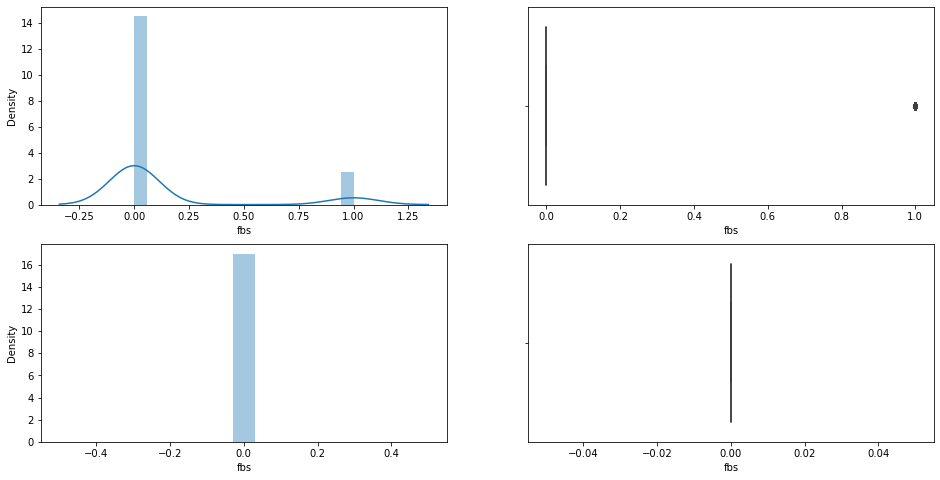

In [68]:
create_comparison_plot(df,df1,'fbs')

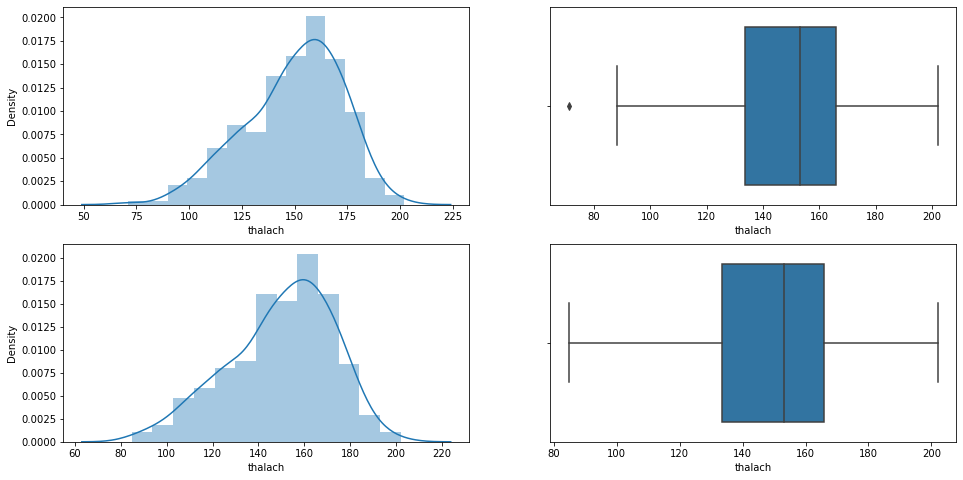

In [69]:
create_comparison_plot(df,df1,'thalach')

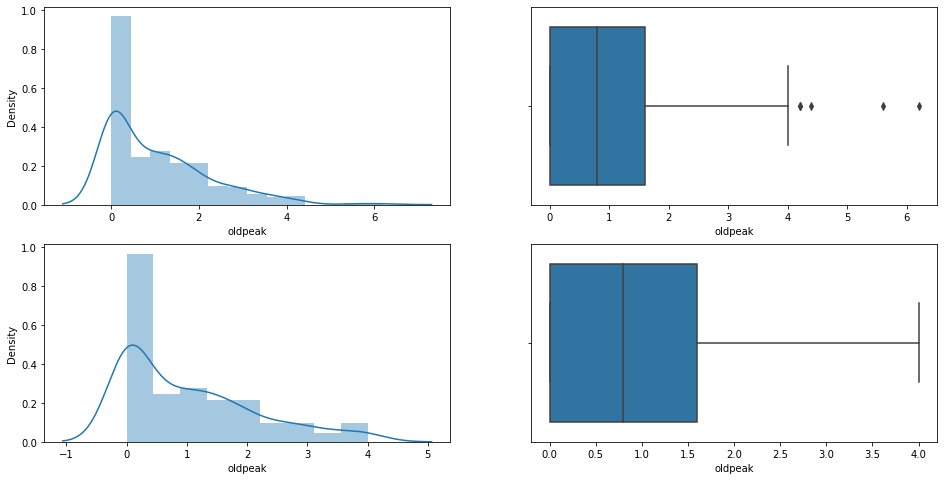

In [70]:
create_comparison_plot(df,df1,'oldpeak')

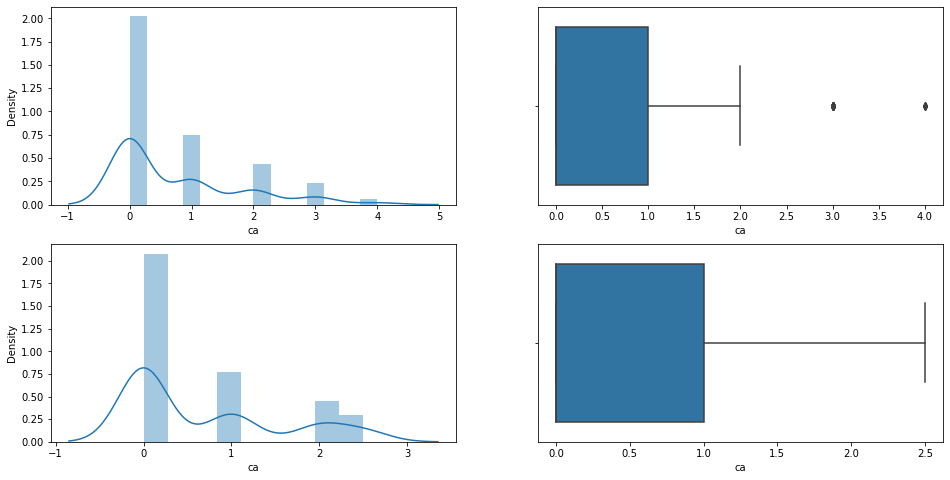

In [71]:
create_comparison_plot(df,df1,'ca')

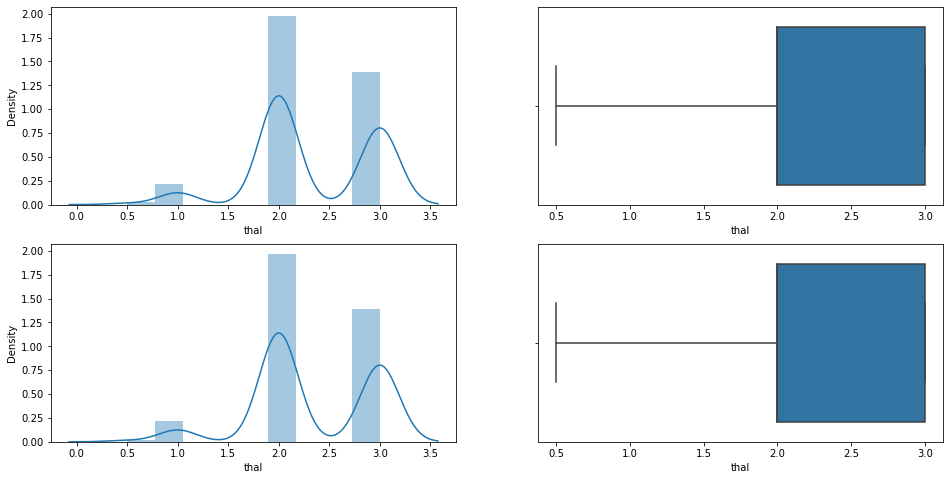

In [72]:
create_comparison_plot(df,df1,'thal')

### comparing skewness

In [73]:
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        0.796014
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.323530
target     -0.179821
dtype: float64

In [74]:
df1.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.386367
chol        0.333267
fbs         0.000000
restecg     0.162522
thalach    -0.493392
exang       0.742532
oldpeak     0.997885
slope      -0.508316
ca          0.919045
thal       -0.323530
target     -0.179821
dtype: float64

### splitting the dataset into dependent and independent features

In [75]:
x = df1.drop(columns = ['target'])
y = df1['target']

### Relationship between dependent and independent features

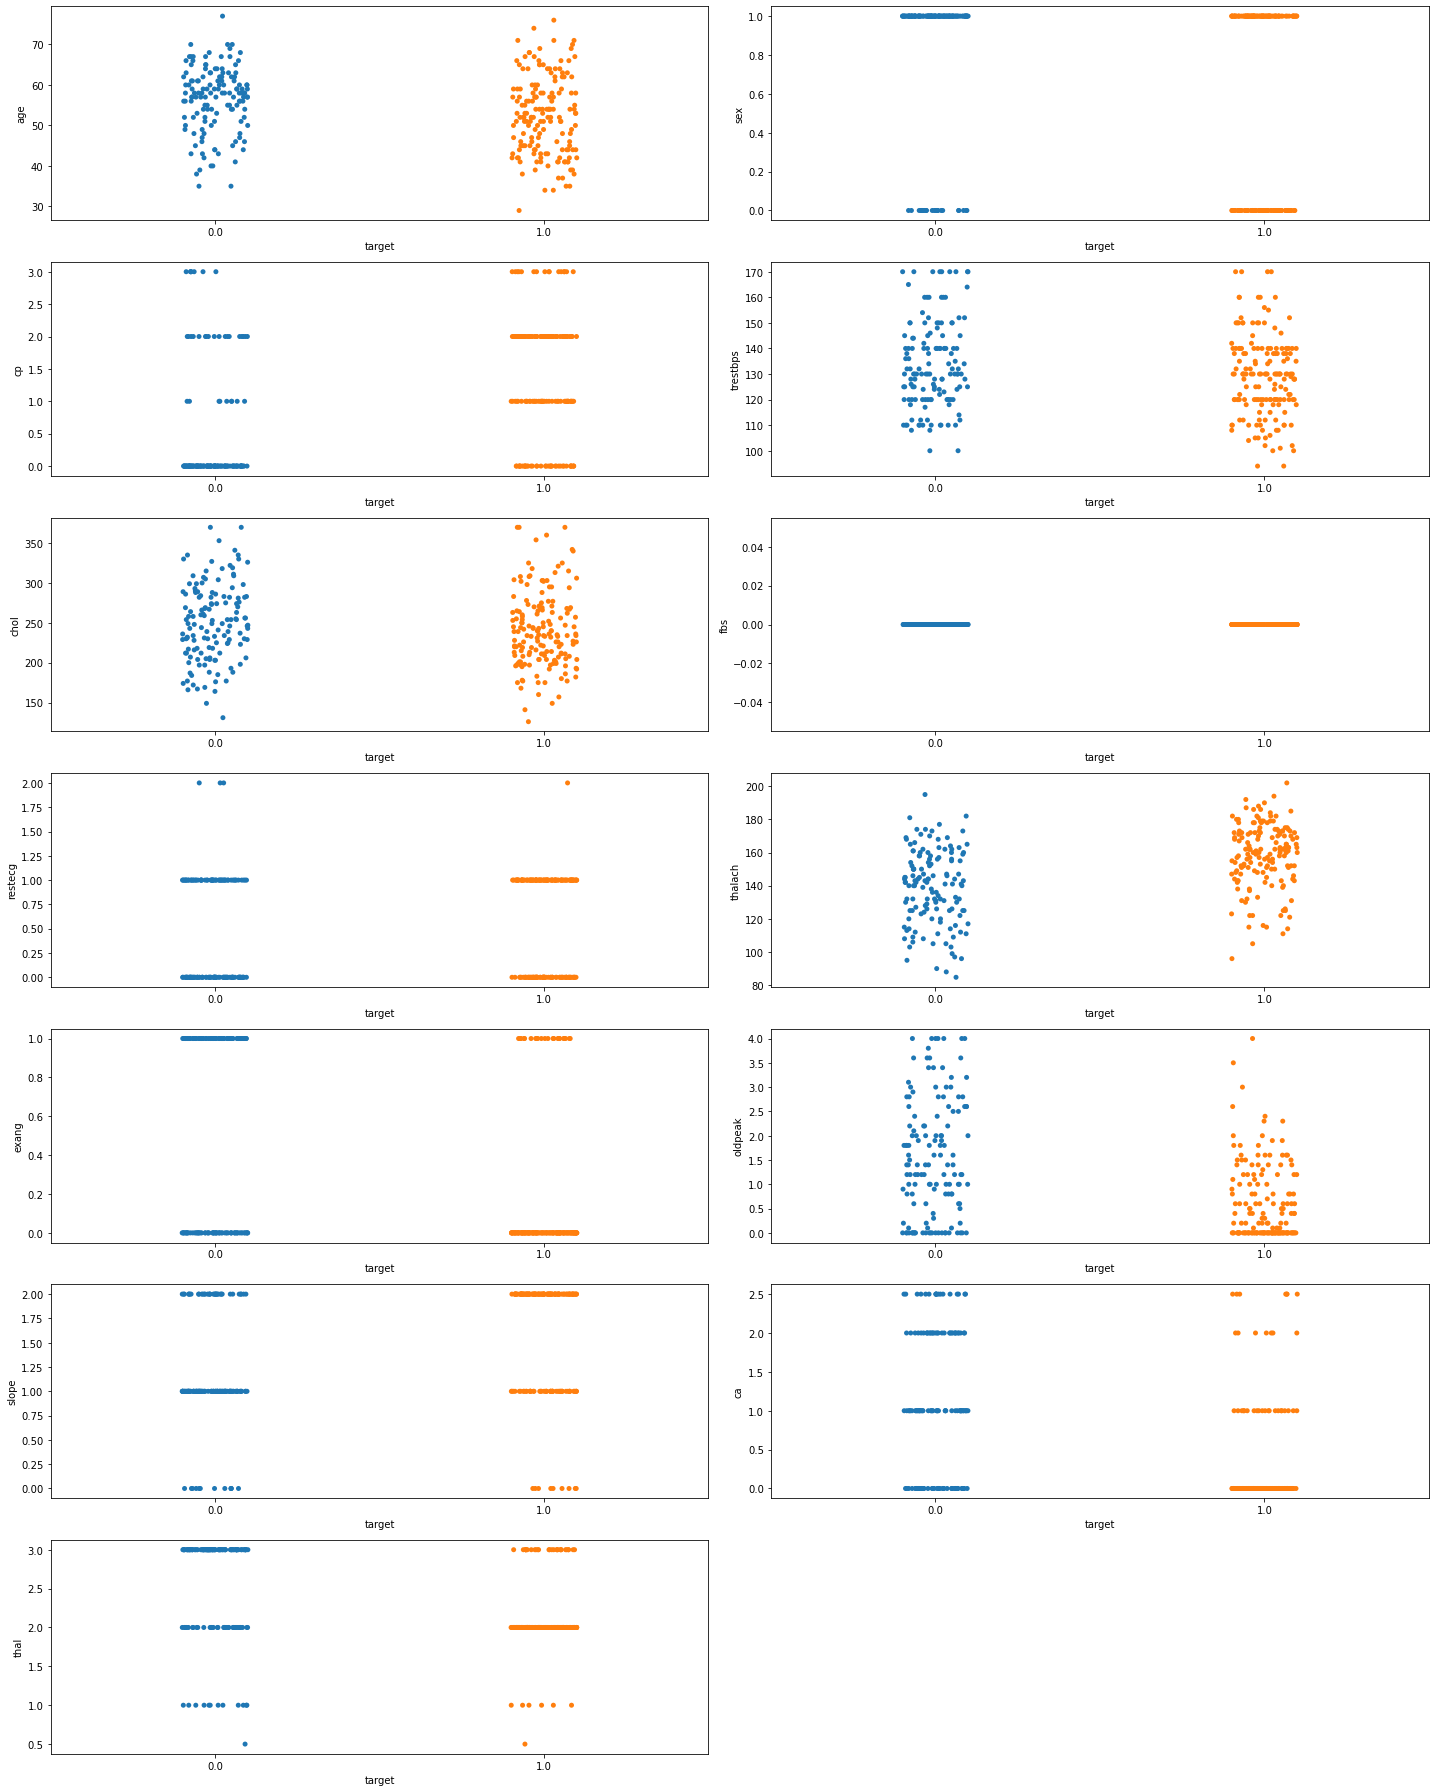

In [76]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber <= 13 :
        ax = plt.subplot(7,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

### Graphical Analysis between dependent and independent features

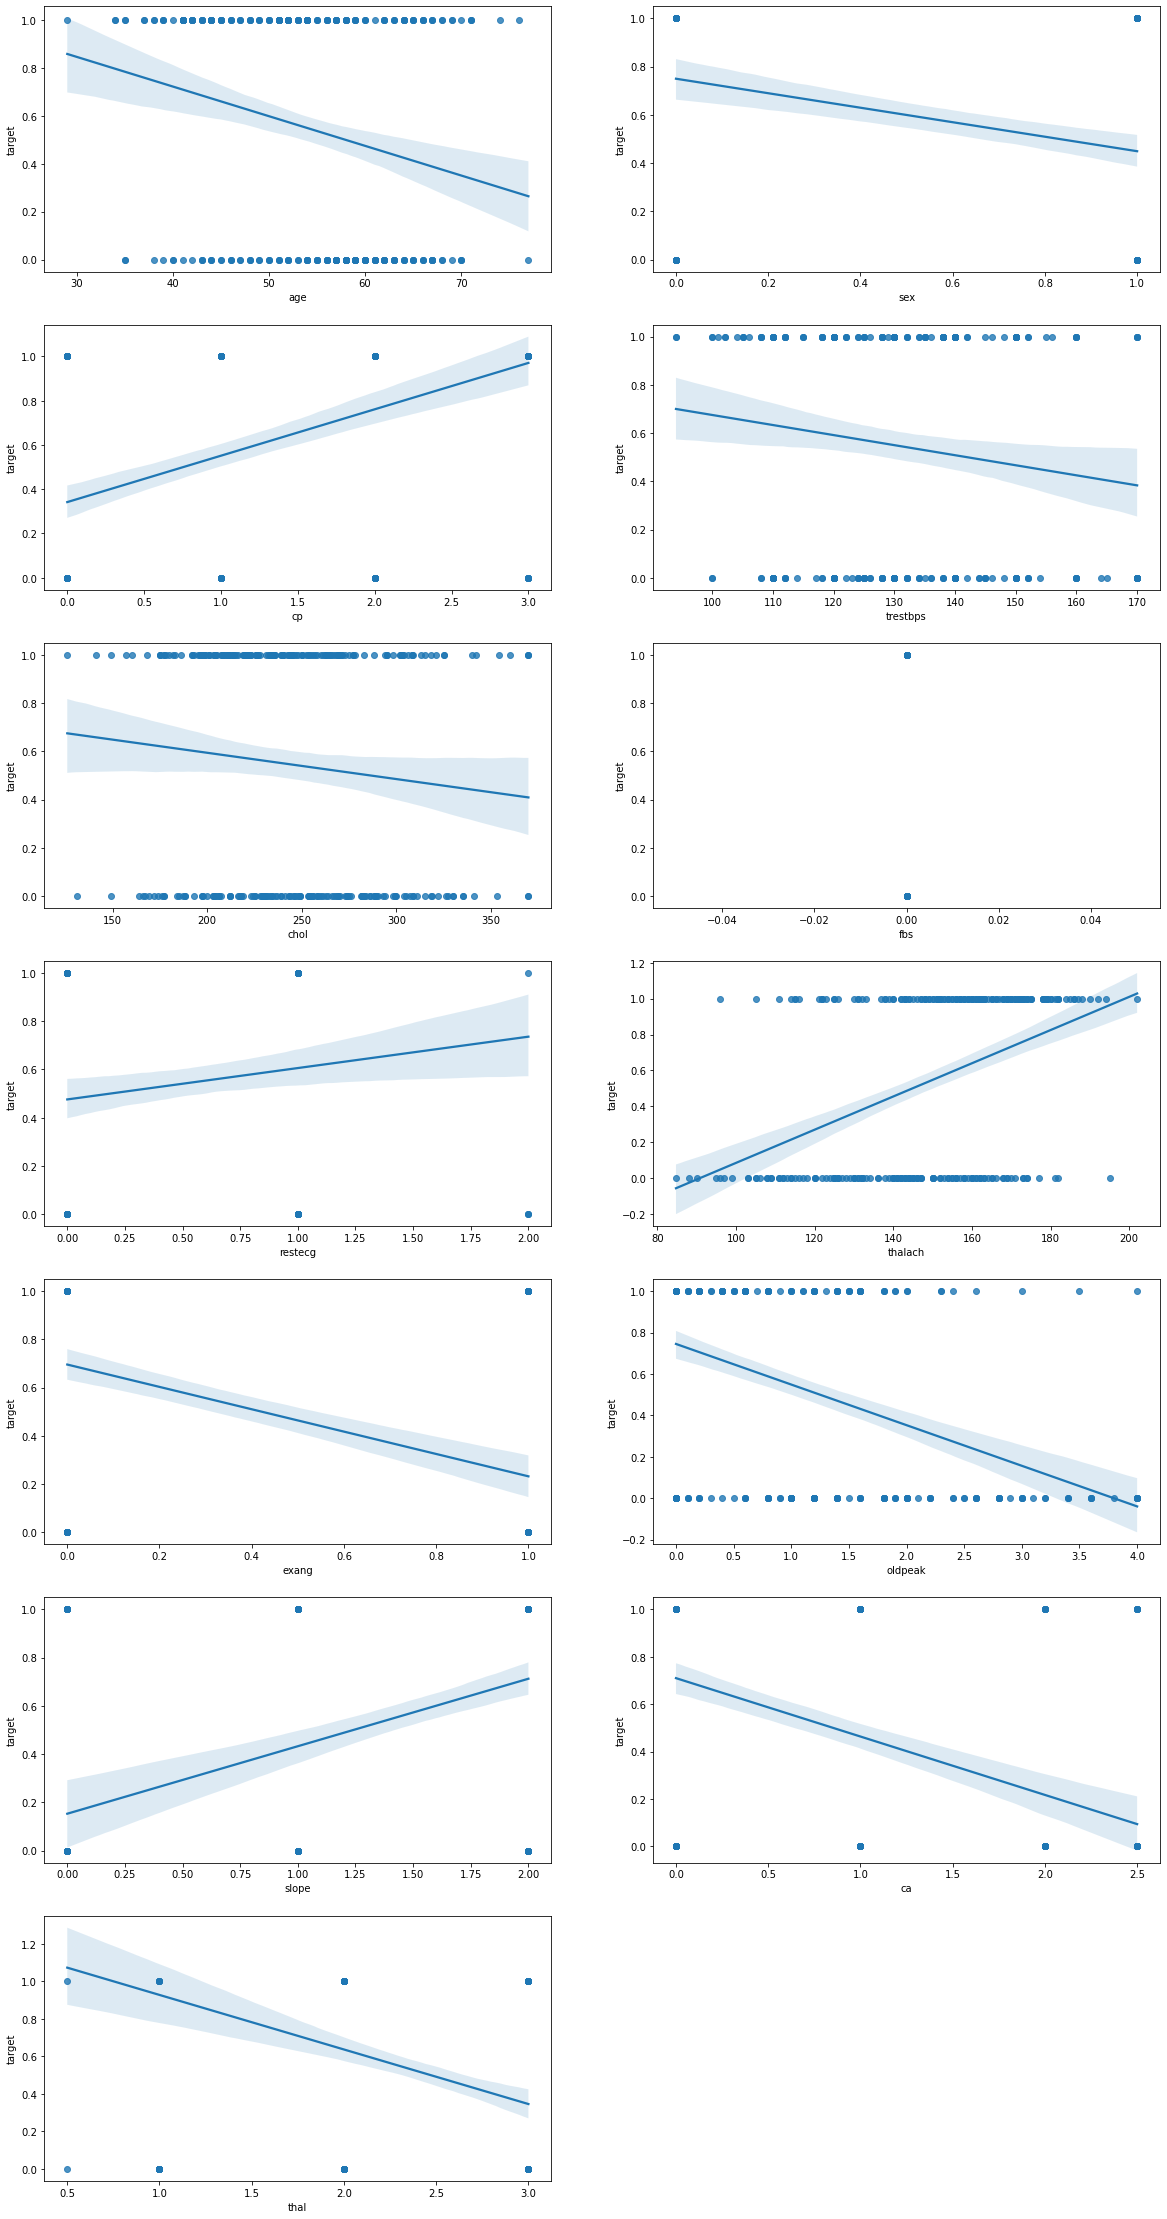

In [77]:
plt.figure(figsize=(20,40))
for i in enumerate(x.columns):
    plt.subplot(7,2,i[0]+1)
    sns.regplot(x=df1[i[1]],y=df1['target'])

### Training Model

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [79]:
X_train.shape ,Y_train.shape # 242 samples for training

((242, 13), (242,))

In [80]:
X_test.shape ,Y_test.shape # 61 samples for testing

((61, 13), (61,))

#### scaling data

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.55722251,  0.68964466, -0.94111333, ..., -0.67505958,
         1.54568943,  1.16441088],
       [ 1.54391408,  0.68964466,  1.95400648, ..., -0.67505958,
         0.39297189, -0.49316225],
       [-0.10057187,  0.68964466, -0.94111333, ...,  0.9585846 ,
        -0.75974565, -0.49316225],
       ...,
       [-2.84138178,  0.68964466,  0.02392661, ...,  0.9585846 ,
        -0.75974565, -0.49316225],
       [-0.53910145, -1.4500221 ,  0.98896655, ..., -0.67505958,
        -0.75974565, -0.49316225],
       [ 0.8861197 ,  0.68964466, -0.94111333, ..., -0.67505958,
         0.39297189,  1.16441088]])

In [83]:
X_test = scaler.transform(X_test)
X_test

array([[-2.10204264e-01,  6.89644659e-01,  9.88966547e-01,
        -1.00845536e-01, -2.07560009e-02,  0.00000000e+00,
        -9.71329848e-01,  1.02120884e+00, -6.76632341e-01,
        -9.03482443e-01,  9.58584599e-01,  2.12204819e+00,
        -4.93162253e-01],
       [ 8.86119700e-01, -1.45002210e+00, -9.41113327e-01,
        -4.59737001e-01, -1.07369572e+00,  0.00000000e+00,
         9.09164738e-01, -6.42756215e-01,  1.47790748e+00,
        -9.03482443e-01, -6.75059577e-01, -7.59745650e-01,
        -4.93162253e-01],
       [ 3.37957718e-01, -1.45002210e+00, -9.41113327e-01,
        -1.89530286e+00,  2.22211303e-02,  0.00000000e+00,
        -9.71329848e-01, -1.27236461e+00, -6.76632341e-01,
        -8.87216801e-03, -6.75059577e-01, -7.59745650e-01,
        -4.93162253e-01],
       [-1.52579302e+00, -1.45002210e+00,  2.39266100e-02,
        -1.59622664e+00, -1.05220715e+00,  0.00000000e+00,
         9.09164738e-01,  7.96348701e-01, -6.76632341e-01,
        -9.03482443e-01,  9.58584599e

### Model fitting

In [84]:
from sklearn.metrics import accuracy_score

### 1] Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [86]:
classifier.fit(X_train,Y_train)

LogisticRegression()

In [87]:
#prediction
y_pred = classifier.predict(X_test)
y_pred

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0.])

In [88]:
from sklearn.metrics import accuracy_score,classification_report

In [89]:
score_lr = accuracy_score(y_pred,Y_test)
print('Accuracy score using logistic regression : ',score_lr)

Accuracy score using logistic regression :  0.8852459016393442


In [90]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88        27
         1.0       0.97      0.82      0.89        34

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



### 2] Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

y_pred = nb.predict(X_test)

In [92]:
score_nb = accuracy_score(y_pred,Y_test)
print('Accuracy score using Naive Bayes : ',score_nb)

Accuracy score using Naive Bayes :  0.9180327868852459


In [93]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92        31
         1.0       0.93      0.90      0.92        30

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



### 3] Support Vector Classification Model

In [94]:
# fitting kernel SVM to the training set

from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state= 1)
svc.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

In [95]:
# predicting the test set results
y_pred = svc.predict(X_test)

In [96]:
score_svm = accuracy_score(y_pred,Y_test)
print('Accuracy score using SVC model : ',score_svm)

Accuracy score using SVC model :  0.8688524590163934


In [97]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86        26
         1.0       0.97      0.80      0.88        35

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



### 4] K Nearest Neighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)

In [99]:
score_knn = accuracy_score(y_pred,Y_test)
print('Accuracy score using K nearest neighbors : ',score_knn)

Accuracy score using K nearest neighbors :  0.8852459016393442


In [100]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88        27
         1.0       0.97      0.82      0.89        34

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



### 5] Decision Tree Classifier

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [102]:
y_pred = dt.predict(X_test)

In [103]:
score_dt = accuracy_score(y_pred,Y_test)
print('Accuracy score using Decision Tree : ',score_dt)

Accuracy score using Decision Tree :  0.8360655737704918


In [104]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83        28
         1.0       0.90      0.79      0.84        33

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### 6] Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 50)

In [106]:
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [107]:
y_pred = rf.predict(X_test)

In [108]:
score_rf = accuracy_score(y_pred,Y_test)
print('Accuracy score using Random Forest   : ',score_rf)

Accuracy score using Random Forest   :  0.8852459016393442


In [109]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        25
         1.0       1.00      0.81      0.89        36

    accuracy                           0.89        61
   macro avg       0.89      0.90      0.88        61
weighted avg       0.91      0.89      0.89        61



### 7] Ensemble Model Bagging Classifier

In [110]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(base_estimator= None , n_estimators=10, max_samples= 1.0, max_features= 1.0, bootstrap=True)

In [111]:
bc.fit(X_train,Y_train)

BaggingClassifier()

In [112]:
y_pred = bc.predict(X_test)

In [113]:
score_bc = accuracy_score(y_pred,Y_test)
print('Accuracy score using Bagging Classifier   : ',score_bc)

Accuracy score using Bagging Classifier   :  0.8852459016393442


In [114]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89        29
         1.0       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### 8] Adaboost Classifier Model

In [115]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100,random_state=1)

In [116]:
ab.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [117]:
y_pred = ab.predict(X_test)

In [118]:
score_ab = accuracy_score(y_pred,Y_test)
print('Accuracy score using Adaboost Classifier   : ',score_ab)

Accuracy score using Adaboost Classifier   :  0.9180327868852459


In [119]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92        27
         1.0       1.00      0.85      0.92        34

    accuracy                           0.92        61
   macro avg       0.92      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



### 9] Gradient Boosting Classifier

In [120]:
from sklearn.ensemble import GradientBoostingClassifier


In [121]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)

In [122]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)

In [123]:
y_pred = gb.predict(X_test)

In [124]:
score_gb = accuracy_score(y_pred,Y_test)
print('Accuracy score using Gradient boosting Classifier   : ',score_gb)

Accuracy score using Gradient boosting Classifier   :  0.8688524590163934


In [125]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86        26
         1.0       0.97      0.80      0.88        35

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



### 10] XGBoost Classifier

In [126]:
conda install -c anaconda py-xgboost

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.1.0               |   py39haa95532_0         980 KB  anaconda
    ------------------------------------------------------------
                                           Total:         980 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> anaconda 




conda-23.1.0         | 980 KB    |            |   0% 
                                                     



Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/anaconda/win-64/conda-23.1.0-py39haa95532_0.tar.bz2>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.




In [127]:

import xgboost as xgb

In [128]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[19:13:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [129]:
score_xgb = accuracy_score(y_pred,Y_test)
print('Accuracy score using XGboost Classifier   : ',score_xgb)

Accuracy score using XGboost Classifier   :  0.8688524590163934


In [130]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.96      0.86        26
         1.0       0.97      0.80      0.88        35

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



### output:

In [131]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_bc,score_ab,score_gb,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Bagging Classifier","Adaboost","GradientBoost","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i]))

The accuracy score achieved using Logistic Regression is: 0.8852459016393442
The accuracy score achieved using Naive Bayes is: 0.9180327868852459
The accuracy score achieved using Support Vector Machine is: 0.8688524590163934
The accuracy score achieved using K-Nearest Neighbors is: 0.8852459016393442
The accuracy score achieved using Decision Tree is: 0.8360655737704918
The accuracy score achieved using Random Forest is: 0.8852459016393442
The accuracy score achieved using Bagging Classifier is: 0.8852459016393442
The accuracy score achieved using Adaboost is: 0.9180327868852459
The accuracy score achieved using GradientBoost is: 0.8688524590163934
The accuracy score achieved using XGBoost is: 0.8688524590163934


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

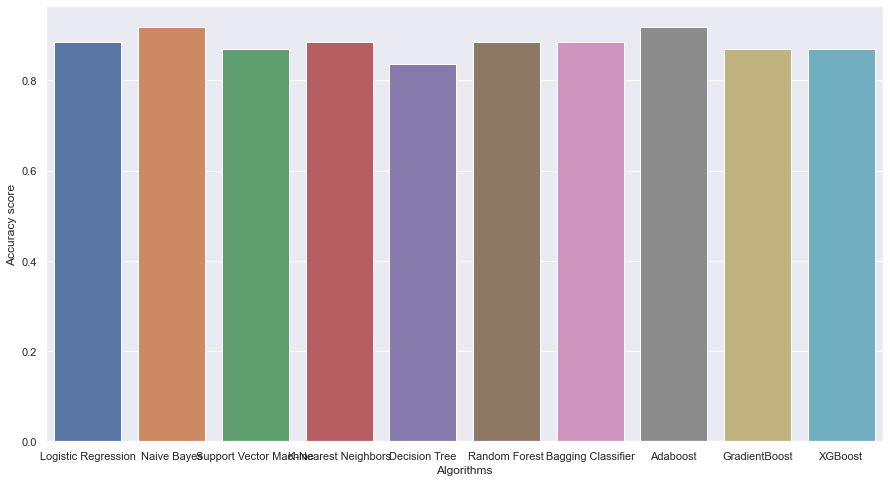

In [132]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

## Let's test models

## 1.Adaboost Model

In [133]:
def predict_heart_disease_ab(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope,ca,thal):  
    x=np.zeros(13)
    x[0]=age
    x[1]=sex
    x[2]=cp
    x[3]=trestbps
    x[4]=chol
    x[5]=fbs
    x[6]=restecg
    x[7]=thalach
    x[8]=exang
    x[9]=oldpeak
    x[10]=slope
    x[11]=ca
    x[12]=thal
    target = ab.predict([x])[0]
    return target

In [134]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0,1.0,1.0
1,37,1.0,2,130,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0,2.0,1.0
2,41,0.0,1,130,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0,2.0,1.0
3,56,1.0,1,120,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0,2.0,1.0
4,57,0.0,0,120,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0,2.0,1.0


In [135]:
predict_heart_disease_ab(63,1.0,3,145,233,1,0,150,0,2.3,0,0,1)##expected 1.0 [wrong prediction]


0.0

In [136]:
predict_heart_disease_ab(37,1.0,2,130,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0,2.0)#expected 1.0 [wrong prediction]

0.0

## 2.SVC Model

In [137]:
def predict_heart_disease_svc(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope,ca,thal):  
    x=np.zeros(13)
    x[0]=age
    x[1]=sex
    x[2]=cp
    x[3]=trestbps
    x[4]=chol
    x[5]=fbs
    x[6]=restecg
    x[7]=thalach
    x[8]=exang
    x[9]=oldpeak
    x[10]=slope
    x[11]=ca
    x[12]=thal
    target = svc.predict([x])[0]
    return target

In [138]:
predict_heart_disease_svc(37,1.0,2,130,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0,2.0)#[correct prediction=1.0]


1.0

In [139]:
predict_heart_disease_svc(63,1.0,3,145,233,1,0,150,0,2.3,0,0,1)#[correct prediction=1.0]


0.0

In [140]:
predict_heart_disease_svc(57,0.0,0,120,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0,2.0)#[correct prediction=1.0]

0.0

## 3.Naive Bayes model

In [141]:
def predict_heart_disease_nb(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope,ca,thal):  
    x=np.zeros(13)
    x[0]=age
    x[1]=sex
    x[2]=cp
    x[3]=trestbps
    x[4]=chol
    x[5]=fbs
    x[6]=restecg
    x[7]=thalach
    x[8]=exang
    x[9]=oldpeak
    x[10]=slope
    x[11]=ca
    x[12]=thal
    target = nb.predict([x])[0]
    return target

In [142]:
predict_heart_disease_nb(37,1.0,2,130,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0,2.0)#[correct prediction=1.0]


0.0

In [143]:
predict_heart_disease_nb(63,1.0,3,145,233,1,0,150,0,2.3,0,0,1)#[correct prediction=1.0]


0.0

In [144]:
predict_heart_disease_nb(57,0.0,0,120,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0,2.0)#[correct prediction=1.0]


0.0